In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import csv
from tqdm import tqdm

In [376]:
# import data
df = pd.read_csv('00_df.csv', index_col=0)
pre_df = pd.read_csv('01_pre_df.csv', index_col=0)
interpolated_mv_df = pd.read_csv('02_interpolated_mv_df.csv', index_col=0)

In [377]:
df.shape

(783926, 41)

In [378]:
pre_df.shape

(783926, 37)

In [379]:
interpolated_mv_df.shape

(783926, 40)

In [380]:
# import list data

data_length_per_person = []
data_length_per_person_sum = []

with open('data_length_per_person.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person.append(int(i))


with open('data_length_per_person_sum.csv', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f)
    for para in rdr:
        for i in para:
            data_length_per_person_sum.append(int(i))

In [381]:
len(data_length_per_person)   # 20169

20169

In [382]:
len(data_length_per_person_sum)   # 20169

20169

## 선형회귀를 사용한 결측치 대치 기준 이상의 결측열은 삭제 후 모델링

In [383]:
interpolated_mv_df

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,101.6,91.5,36.80,126.8,87.30,NaN,24.8,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,36.80,98.0,75.33,NaN,19.0,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,36.80,122.0,86.00,NaN,22.0,20.7,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,36.80,126.8,87.30,NaN,30.0,24.0,46.5,0.30,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,36.80,122.0,91.33,NaN,24.5,20.7,46.5,0.28,...,10.2,NaN,327.5,83.14,0,NaN,NaN,-0.03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,38.10,135.0,81.00,64.0,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,31,1
783922,96.0,98.0,38.72,174.0,97.00,72.0,16.0,2.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,32,1
783923,140.0,97.0,38.10,133.0,81.50,62.5,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,33,1
783924,120.0,96.0,38.10,154.0,118.00,105.0,16.0,0.0,25.7,0.50,...,14.0,NaN,325.5,62.29,1,NaN,NaN,-0.03,34,1


In [384]:
interpolated_mv_df.drop(['Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'], axis=1, inplace=True)

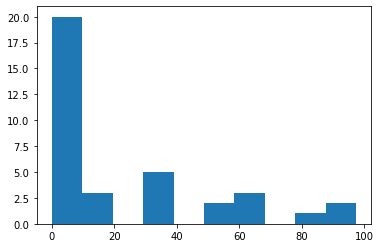

In [385]:
plt.hist(interpolated_mv_df.isnull().sum() / interpolated_mv_df.shape[0]*100)
plt.show()

In [387]:
interpolated_mv_df.isnull().sum() / interpolated_mv_df.shape[0]*100

HR                   0.001148
O2Sat                0.026916
Temp                 0.858499
SBP                  1.269125
MAP                  0.003062
DBP                 32.635733
Resp                 0.089422
BaseExcess          32.518631
HCO3                 1.298464
FiO2                36.225358
pH                  29.944663
PaCO2               32.828354
SaO2                57.334238
AST                 66.450277
BUN                  0.933634
Alkalinephos        67.339519
Calcium             13.873121
Chloride             1.309562
Creatinine           1.020377
Bilirubin_direct    96.241482
Glucose              0.931721
Lactate             56.030799
Magnesium            4.114419
Phosphate           13.209793
Potassium            1.017443
Bilirubin_total     66.958488
TroponinI           97.348857
Hct                  0.773542
Hgb                  1.154956
PTT                 17.837398
WBC                  1.506647
Fibrinogen          85.060962
Platelets            1.387248
Age       

In [388]:
base = 29

In [389]:
mv_cols = interpolated_mv_df.isnull().sum() / interpolated_mv_df.shape[0]*100 >= base

In [390]:
drop_columns_list = interpolated_mv_df.columns[mv_cols]

In [391]:
interpolated_mv_df.drop(drop_columns_list, axis=1, inplace=True)

In [392]:
interpolated_mv_df.shape

(783926, 23)

In [393]:
interpolated_mv_df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'HCO3', 'BUN', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets', 'Age', 'Gender',
       'SepsisLabel'],
      dtype='object')

# base 보다 많은 결측치 포함 columns 제거 후 데이터 전처리 진행

In [394]:
cols = interpolated_mv_df.columns

In [396]:
data_length_per_person_sum.insert(0,0)

In [397]:
L = len(data_length_per_person_sum)

In [398]:
s_i = 0
e_i = 1

df_patient_per_20 = pd.DataFrame(columns = cols)

for i in tqdm(range(len(data_length_per_person_sum)-1)):
    s = data_length_per_person_sum[s_i]
    e = data_length_per_person_sum[e_i]
    if e - s >= 20:
        temp = interpolated_mv_df[e-20:e]
        df_patient_per_20 = pd.concat([df_patient_per_20, temp])
    
    s_i += 1
    e_i += 1

100%|██████████| 20169/20169 [03:50<00:00, 87.68it/s] 


In [399]:
df_patient_per_20

,HR,O2Sat,Temp,SBP,MAP,Resp,HCO3,BUN,Calcium,Chloride,...,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,SepsisLabel
34,102.0,91.5,36.80,103.0,75.67,24.0,46.5,18.0,9.4,85.0,...,3.5,4.2,36.7,12.3,NaN,10.2,327.5,83.14,0,0
35,99.0,89.0,37.11,113.0,96.33,26.0,46.5,18.0,9.4,85.0,...,3.5,4.2,36.7,12.3,NaN,10.2,327.5,83.14,0,0
36,97.0,89.0,36.80,110.0,72.00,29.0,46.5,18.0,9.4,85.0,...,3.5,4.2,36.7,12.3,NaN,10.2,327.5,83.14,0,0
37,110.0,89.0,36.80,108.0,90.67,24.0,46.5,18.0,9.4,85.0,...,3.5,4.2,36.7,12.3,NaN,10.2,327.5,83.14,0,0
38,108.0,89.0,36.80,139.0,102.33,26.0,46.5,18.0,9.4,85.0,...,3.5,4.2,36.7,12.3,NaN,10.2,327.5,83.14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783921,88.0,98.0,38.10,135.0,81.00,16.0,25.7,20.5,8.2,103.7,...,4.0,3.8,31.2,11.6,29.8,14.0,325.5,62.29,1,1
783922,96.0,98.0,38.72,174.0,97.00,16.0,25.7,26.0,8.2,103.7,...,3.5,3.9,27.8,11.6,29.8,14.0,325.5,62.29,1,1
783923,140.0,97.0,38.10,133.0,81.50,16.0,25.7,20.5,8.2,103.7,...,4.0,3.8,31.2,11.6,29.8,14.0,325.5,62.29,1,1
783924,120.0,96.0,38.10,154.0,118.00,16.0,25.7,20.5,8.2,103.7,...,4.0,3.8,31.2,11.6,29.8,14.0,325.5,62.29,1,1


# 스케일링 진행

In [402]:
label = df_patient_per_20["SepsisLabel"]

In [403]:
# 정규 분포
df_patient_per_20 = (df_patient_per_20 - df_patient_per_20.mean())/df_patient_per_20.std()
df_patient_per_20.head()

,HR,O2Sat,Temp,SBP,MAP,Resp,HCO3,BUN,Calcium,Chloride,...,Phosphate,Potassium,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,SepsisLabel
34,1.066961,-1.862253,-0.239035,-0.880981,-0.211372,0.974005,5.647835,-0.256995,1.54313,-4.004401,...,-0.029089,0.144512,1.131153,0.975539,NaN,-0.238756,1.110786,1.255027,-1.173589,-0.18765
35,0.883750,-2.714666,0.277930,-0.400239,1.200863,1.358281,5.647835,-0.256995,1.54313,-4.004401,...,-0.029089,0.144512,1.131153,0.975539,NaN,-0.238756,1.110786,1.255027,-1.173589,-0.18765
36,0.761609,-2.714666,-0.239035,-0.544461,-0.462239,1.934695,5.647835,-0.256995,1.54313,-4.004401,...,-0.029089,0.144512,1.131153,0.975539,NaN,-0.238756,1.110786,1.255027,-1.173589,-0.18765
37,1.555525,-2.714666,-0.239035,-0.640610,0.813968,0.974005,5.647835,-0.256995,1.54313,-4.004401,...,-0.029089,0.144512,1.131153,0.975539,NaN,-0.238756,1.110786,1.255027,-1.173589,-0.18765
38,1.433384,-2.714666,-0.239035,0.849690,1.611000,1.358281,5.647835,-0.256995,1.54313,-4.004401,...,-0.029089,0.144512,1.131153,0.975539,NaN,-0.238756,1.110786,1.255027,-1.173589,-0.18765


In [404]:
df_patient_per_20["SepsisLabel"] = label

In [405]:
df_patient_per_20.shape

(351700, 23)

# sepsis vs non_sepsis 추출

In [406]:
# sepsis와 non sepsis 구분

s = 0
e = 20

sepsis_df = pd.DataFrame(columns=cols)
non_sepsis_df = pd.DataFrame(columns=cols)

for _ in tqdm(range(people)):
    if df_patient_per_20[s:e]['SepsisLabel'].sum() >= 1:
        data = df_patient_per_20[s:e]
        sepsis_df = pd.concat([sepsis_df, data])
    else: 
        data = df_patient_per_20[s:e]
        non_sepsis_df = pd.concat([non_sepsis_df, data])
        
    s += 20
    e += 20

100%|██████████| 17585/17585 [03:41<00:00, 79.41it/s]


In [544]:
sepsis_df.shape

(24700, 23)

In [545]:
non_sepsis_df.shape

(327000, 23)

# Title > 3시간의 데이터를 보고 6시간 후의 패혈증 발병 확률을 예측
## Label 분리
1환자당 12개의 데이터 추출가능

In [409]:
e = 20

s_label = []
for i in tqdm(range(int(sepsis_df.shape[0]/20))):
    temp = sepsis_df["SepsisLabel"][e-12:e]
    s_label.append(list(temp))
    
    e += 20

100%|██████████| 1235/1235 [00:00<00:00, 24764.85it/s]


In [410]:
e = 20

ns_label = []
for i in tqdm(range(int(non_sepsis_df.shape[0]/20))):
    temp = non_sepsis_df["SepsisLabel"][e-12:e]
    ns_label.append(list(temp))
    
    e += 20

100%|██████████| 16350/16350 [00:00<00:00, 29859.74it/s]


# 훈련, 검증, 테스트 세트 구성


In [411]:
sepsis_df_no_label = sepsis_df.drop(['SepsisLabel'], axis=1)
sepsis_df_no_label.shape

(24700, 22)

In [412]:
non_sepsis_df_no_label = non_sepsis_df.drop(['SepsisLabel'], axis=1)
non_sepsis_df_no_label.shape

(327000, 22)

# 환자별 column 평균으로 결측치 대치

In [413]:
cols = sepsis_df_no_label.columns
cols

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'HCO3', 'BUN', 'Calcium',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets', 'Age', 'Gender'],
      dtype='object')

In [414]:
# 환자 별 평균
person_mean = []

s_i = 0
e_i = 20

for _ in tqdm(range(int(sepsis_df_no_label.shape[0]/20))):
    temp = []
    for col in cols:
        temp.append(sepsis_df_no_label[col][s_i:e_i].mean())
    person_mean.append(temp)
    
    s_i += 20
    e_i += 20
    
len(person_mean)

100%|██████████| 1235/1235 [00:01<00:00, 690.25it/s]


1235

In [415]:
# 환자별 평균을 정리한 리스트에 결측값을 0으로 변환

for i in tqdm(range(len(person_mean))):
    for j in range(len(person_mean[i])):
        if str(person_mean[i][j]) == "nan":
            person_mean[i][j] = 0
        else:
            person_mean[i][j] = round(person_mean[i][j], 1)

100%|██████████| 1235/1235 [00:00<00:00, 25074.26it/s]


In [419]:
# DP 생성 후 결측치 없는 데이터 세트 구성

sepsis_df_no_label_and_mv = pd.DataFrame(columns = cols)

s_i = 0
e_i = 20

for i in tqdm(range(sepsis_df_no_label.shape[0]//20)):
    temp = pd.DataFrame()
    for j, col in enumerate(cols):
        temp[col] = sepsis_df_no_label[col][s_i:e_i].fillna(person_mean[i][j])
        
    sepsis_df_no_label_and_mv = pd.concat([sepsis_df_no_label_and_mv, temp])
    s_i += 20
    e_i += 20

100%|██████████| 1235/1235 [00:11<00:00, 104.89it/s]


In [420]:
def ratio(li):
    l = len(li)
    train = l*0.8
    val = train + int(l*0.1)
    return int(train), int(val)

In [421]:
tr, va = ratio(s_label)
print(tr, va)

988 1111


# Sepsis 데이터 분리 

In [422]:
# sepsis 데이터 > x_train, x_val, x_test

s = 0
x_train = []
x_val = []
x_test = []

for _ in tqdm(range(int(sepsis_df_no_label_and_mv.shape[0]/20))):
    if _ < tr:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_train.append(temp)
    elif _ < va:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_val.append(temp)
    else: 
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_test.append(temp)
    s += 20

100%|██████████| 1235/1235 [00:03<00:00, 352.63it/s]


In [424]:
print(len(x_train)//12, len(x_val)//12, len(x_test)//12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

988 123 124 1235


## non_sepsis_df 에도 동일하게 수행 
단, 데이터 비율을 sepsis 기준 1:1로 맞춰서 진행

In [425]:
# non sepsis 환자 별 평균
person_mean = []

s_i = 0
e_i = 20

for _ in tqdm(range(int(non_sepsis_df_no_label.shape[0]/20))):
    temp = []
    for col in cols:
        temp.append(non_sepsis_df_no_label[col][s_i:e_i].mean())
    person_mean.append(temp)
    
    s_i += 20
    e_i += 20
    
len(person_mean)

100%|██████████| 16350/16350 [00:24<00:00, 657.88it/s]


16350

In [426]:
# 환자별 평균을 정리한 리스트에 결측값을 0으로 변환

for i in tqdm(range(len(person_mean))):
    for j in range(len(person_mean[i])):
        if str(person_mean[i][j]) == "nan":
            person_mean[i][j] = 0
        else:
            person_mean[i][j] = round(person_mean[i][j], 1)

100%|██████████| 16350/16350 [00:00<00:00, 24761.39it/s]


In [427]:
# 결측치 없는 non sepsis DF 생성

non_sepsis_df_no_label_and_mv = pd.DataFrame(columns = cols)

s_i = 0
e_i = 20

for i in tqdm(range(int(non_sepsis_df_no_label.shape[0]/20))):
    temp = pd.DataFrame()
    for j, col in enumerate(cols):
        temp[col] = non_sepsis_df_no_label[col][s_i:e_i].fillna(person_mean[i][j])
        
    non_sepsis_df_no_label_and_mv = pd.concat([non_sepsis_df_no_label_and_mv, temp])
    s_i += 20
    e_i += 20

100%|██████████| 16350/16350 [05:28<00:00, 49.81it/s]


In [428]:
# non_sepsis 데이터 > x_train, x_val, x_test에 추가 

s = 0

for _ in tqdm(range(int(non_sepsis_df_no_label_and_mv.shape[0]/20))):
    if _ < tr:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_train.append(temp)
    elif _ < va:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_val.append(temp)
    elif _ < 1235:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_test.append(temp)
    else:
        break
    s += 20

  8%|▊         | 1235/16350 [00:03<00:45, 330.69it/s]


In [429]:
print(len(x_train)//12, len(x_val)//12, len(x_test)//12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

1976 246 248 2470


In [445]:
# sepsis label > train, val, test set 구성

y_train = []
y_val = []
y_test = []   # 988 123 124 1235

for i in range(len(s_label)):
    if i < tr:
        y_train += s_label[i]
    elif i < va:
        y_val += s_label[i]
    elif i < 1235:
        y_test += s_label[i]
    else:
        break

In [446]:
y_train += [0] * len(y_train)
y_val += [0] * len(y_val)
y_test += [0] * len(y_test)

In [447]:
print(len(y_train)//12, len(y_val)//12, len(y_test)//12, len(y_train)//12 + len(y_val)//12 + len(y_test)//12)

1976 246 248 2470


# numpy 배열로 변환
> X(대문자)_train 으로 변경

In [448]:
X_train = np.array(x_train)
X_val = np.array(x_val)
X_test = np.array(x_test)

Y_train = np.array(y_train)
Y_val = np.array(y_val)
Y_test = np.array(y_test)

In [449]:
X_train.shape

(23712, 3, 22)

# 데이터 Shuffle 적용

In [450]:
# Train, Test data 적용
i = np.arange(X_train.shape[0])
np.random.shuffle(i)

X_train = X_train[i]
Y_train = Y_train[i]

In [451]:
# Val data 적용

i = np.arange(X_val.shape[0])
np.random.shuffle(i)

X_val = X_val[i]
Y_val = Y_val[i]

# 데이터 세트 구성 완료

# 모델 구성

In [452]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, activation='tanh', input_shape=(3, 22)))
# model.add(Dense(82, activation='relu'))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation='sigmoid'))

model.summary()

In [ ]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.01)  ## Defult Learning_rate = 0.01

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD, metrics=['accuracy'])

In [543]:
hist = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/30
741/741 [==============================] - 3s 4ms/step - loss: 0.5691 - accuracy: 0.7012 - val_loss: 0.6449 - val_accuracy: 0.6165
Epoch 2/30
741/741 [==============================] - 3s 5ms/step - loss: 0.5655 - accuracy: 0.7056 - val_loss: 0.6429 - val_accuracy: 0.6189
Epoch 3/30
741/741 [==============================] - 3s 5ms/step - loss: 0.5620 - accuracy: 0.7078 - val_loss: 0.6452 - val_accuracy: 0.6155
Epoch 4/30
741/741 [==============================] - 5s 7ms/step - loss: 0.5585 - accuracy: 0.7118 - val_loss: 0.6459 - val_accuracy: 0.6131
Epoch 5/30
741/741 [==============================] - 3s 4ms/step - loss: 0.5550 - accuracy: 0.7155 - val_loss: 0.6470 - val_accuracy: 0.6152
Epoch 6/30
741/741 [==============================] - 3s 4ms/step - loss: 0.5517 - accuracy: 0.7189 - val_loss: 0.6491 - val_accuracy: 0.6142
Epoch 7/30
741/741 [==============================] - 3s 4ms/step - loss: 0.5484 - accuracy: 0.7217 - val_loss: 0.6494 - val_accuracy: 0.6118
Epoch 

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.show()

## 과도한 결측치 대치를 막은 데이터 세트가 더 좋은 결과를 가져옴

In [228]:
hidden_units = 128

model = Sequential()
model.add(LSTM(hidden_units, activation='tanh', input_shape=(3, 27)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 128)               79872     
                                                                 
 dropout_15 (Dropout)        (None, 128)               0         
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 10)                650       
                                                                 
 dense_40 (Dense)            (None, 1)                 11        
                                                                 
Total params: 88,789
Trainable params: 88,789
Non-trainable params: 0
_________________________________________________________________


In [229]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD, metrics=['accuracy'])

In [230]:
hist = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
741/741 [==============================] - 4s 4ms/step - loss: 0.6622 - accuracy: 0.6082 - val_loss: 0.6391 - val_accuracy: 0.6175
Epoch 2/10
741/741 [==============================] - 2s 3ms/step - loss: 0.6362 - accuracy: 0.6334 - val_loss: 0.6325 - val_accuracy: 0.6267
Epoch 3/10
741/741 [==============================] - 2s 3ms/step - loss: 0.6250 - accuracy: 0.6452 - val_loss: 0.6292 - val_accuracy: 0.6223
Epoch 4/10
741/741 [==============================] - 2s 3ms/step - loss: 0.6198 - accuracy: 0.6488 - val_loss: 0.6279 - val_accuracy: 0.6243
Epoch 5/10
741/741 [==============================] - 2s 3ms/step - loss: 0.6161 - accuracy: 0.6502 - val_loss: 0.6255 - val_accuracy: 0.6277
Epoch 6/10
741/741 [==============================] - 2s 3ms/step - loss: 0.6132 - accuracy: 0.6549 - val_loss: 0.6229 - val_accuracy: 0.6297
Epoch 7/10
741/741 [==============================] - 2s 3ms/step - loss: 0.6077 - accuracy: 0.6577 - val_loss: 0.6237 - val_accuracy: 0.6294
Epoch 

# 과적합을 줄이기 위해 데이터세트 증가 
non sepsis 데이터만 증가 가능

# sepsis 정리

In [238]:
# sepsis 데이터 > x_train, x_val, x_test

s = 0
x_train = []
x_val = []
x_test = []

for _ in tqdm(range(int(sepsis_df_no_label_and_mv.shape[0]/20))):
    if _ < tr:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_train.append(temp)
    elif _ < va:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_val.append(temp)
    else: 
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_test.append(temp)
    s += 20

100%|██████████| 1235/1235 [00:04<00:00, 305.00it/s]


In [239]:
print(len(x_train)/12, len(x_val)/12, len(x_test)/12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

988.0 123.0 124.0 1235


# non sepsis 정리

In [240]:
# non sepsis 환자 별 평균
person_mean = []

s_i = 0
e_i = 20

for _ in tqdm(range(int(non_sepsis_df_no_label.shape[0]/20))):
    temp = []
    for col in cols:
        temp.append(non_sepsis_df_no_label[col][s_i:e_i].mean())
    person_mean.append(temp)
    
    s_i += 20
    e_i += 20
    
len(person_mean)

100%|██████████| 16350/16350 [00:31<00:00, 520.73it/s]


16350

In [241]:
# 환자별 평균을 정리한 리스트에 결측값을 0으로 변환

for i in tqdm(range(len(person_mean))):
    for j in range(len(person_mean[i])):
        if str(person_mean[i][j]) == "nan":
            person_mean[i][j] = 0
        else:
            person_mean[i][j] = round(person_mean[i][j], 1)

100%|██████████| 16350/16350 [00:00<00:00, 25061.27it/s]


In [242]:
# 결측치 없는 non sepsis DF 생성

non_sepsis_df_no_label_and_mv = pd.DataFrame(columns = cols)

s_i = 0
e_i = 20

for i in tqdm(range(int(non_sepsis_df_no_label.shape[0]/20))):
    temp = pd.DataFrame()
    for j, col in enumerate(cols):
        temp[col] = non_sepsis_df_no_label[col][s_i:e_i].fillna(person_mean[i][j])
        
    non_sepsis_df_no_label_and_mv = pd.concat([non_sepsis_df_no_label_and_mv, temp])
    s_i += 20
    e_i += 20

100%|██████████| 16350/16350 [06:24<00:00, 42.47it/s]


In [243]:
non_len = non_sepsis_df_no_label_and_mv.shape[0]//20
print('non sepsis 환자 수 : ', non_len)

non sepsis 환자 수 :  16350


In [244]:
# non_sepsis 데이터 > x_train, x_val, x_test에 추가 

s = 0

for _ in tqdm(range(non_len)):
    if _ < tr:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_train.append(temp)
    elif _ < va:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_val.append(temp)
    elif _ < non_len:
        for i in range(12):     # 20개의 데이터 세트에서 12개의 데이터를 label에 달아 사용 가능
            temp = non_sepsis_df_no_label_and_mv[s+i : s+i+3].values.tolist()
            x_test.append(temp)
    else:
        break
    s += 20

100%|██████████| 16350/16350 [00:58<00:00, 281.53it/s]


In [245]:
print(len(x_train)/12, len(x_val)/12, len(x_test)/12, len(x_train)//12 + len(x_val)//12 + len(x_test)//12)

1976.0 246.0 15363.0 17585


In [248]:
# sepsis label > train, val, test set 구성

y_train = []
y_val = []
y_test = []   # 988 123 124 1235

for _ in range(len(s_label)):
    if _ < tr:
        y_train += s_label[_]
    elif _ < va:
        y_val += s_label[_]
    elif _ < 1235:
        y_test += s_label[_]
    else:
        break

In [257]:
y_train += [0] * (len(x_train)-len(y_train))
y_val += [0] * (len(x_val)-len(y_val))
y_test += [0] * (len(x_test)-len(y_test))

In [298]:
len(x_train)

23712

# numpy list로 변환

In [299]:
x_train = np.array(x_train)
x_train

array([[[ 2.96014568, -1.00983987,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.20442755, -1.00983987,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.26549802, -0.32790958,  3.98006871, ...,  0.4998645 ,
         -2.16575771,  0.85208461]],

       [[ 3.20442755, -1.00983987,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.26549802, -0.32790958,  3.98006871, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.38763896, -0.32790958,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461]],

       [[ 3.26549802, -0.32790958,  3.98006871, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.38763896, -0.32790958,  1.09506886, ...,  0.4998645 ,
         -2.16575771,  0.85208461],
        [ 3.08228661,  0.01305556,  2.87943293, ...,  0.4998645 ,
         -2.16575771,  0.85208461]],

       ...,

       [[ 0.5173269 ,  1.03595099,  0.09449088, ..., -0.163558 

In [305]:
x_train.shape

(23712, 3, 27)

In [304]:
x_val = np.array(x_val)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [306]:
# Train, Test data 적용
i = np.arange(x_train.shape[0])
np.random.shuffle(i)

x_train = x_train[i]
y_train = y_train[i]

In [307]:
# Val data 적용

i = np.arange(X_val.shape[0])
np.random.shuffle(i)

x_val = x_val[i]
y_val = y_val[i]

In [308]:
len(x_train), len(x_val), len(x_test)

(23712, 2952, 184356)

In [309]:
len(y_train), len(y_val), len(y_test)

(23712, 2952, 184356)

In [369]:
hidden_units = 128

model = Sequential()
model.add(LSTM(hidden_units, activation='tanh', input_shape=(3, 27)))
model.add(Dropout(0.7))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 128)               79872     
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_55 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_56 (Dense)            (None, 1)                 65        
                                                                 
Total params: 88,193
Trainable params: 88,193
Non-trainable params: 0
_________________________________________________________________


In [370]:
SGD = tf.keras.optimizers.SGD(learning_rate=0.04)

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD, metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel("Epochs")
plt.show()

In [ ]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.show()

In [328]:
result = model.predict(x_test)

In [329]:
from sklearn.metrics import confusion_matrix

In [346]:
r = np.where(result < 0.6, 0, 1)

In [353]:
cm = confusion_matrix(r, y_test)
cm

array([[146317,    665],
       [ 36840,    534]], dtype=int64)

In [348]:
len(y_test)

184356

In [349]:
184356

print(134495 + 667 + 48662 +532)

184356


In [351]:
(tt+ff)/184356*100

79.6562086398056

In [352]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, r)
f1

0.027687760869001633